In [11]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

In [12]:
dataset_name = 'tourism'
dataset = tsag.preprocessing.PreprocessDatasets(dataset_name)
groups = dataset.apply_preprocess()

In [3]:
# Store original results

for transf in ['jitter', 'time_warp', 'magnitude_warp', 'scaling']:
    algorithm = 'gpf'
    gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups)
    model, like = gpf_model.train()
    mean, lower, upper = gpf_model.predict(model, like)
    res = gpf_model.metrics(mean)
    gpf_model.store_metrics(res)

    algorithm = 'mint'
    mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', 
                           groups=groups, 
                           aggregate_key = '(State / Zone / Region) * Purpose')
    forecasts = mint.train()
    results = mint.results(forecasts)
    res = mint.metrics(results)
    mint.store_metrics(res)

    algorithm = 'deepar'
    deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups=groups)
    model = deepar.train()
    forecasts = deepar.predict(model)
    results = deepar.results(forecasts)
    res = deepar.metrics(results)
    deepar.store_metrics(res)

R[write to console]: ── Attaching packages ───────────────────────────────── fpp3 0.4.0 ──

R[write to console]: ✔ tibble      3.1.5      ✔ tsibble     1.1.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.4      ✔ feasts      0.2.2 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.5      

R[write to console]: ── Conflicts ────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

100%|██████████| 304/304 [00:01<00:00, 167.88it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
100%|██████████| 304/304 [00:01<00:00, 171.33it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")


100%|██████████| 304/304 [00:01<00:00, 179.69it/s]


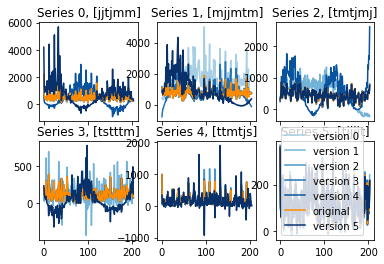

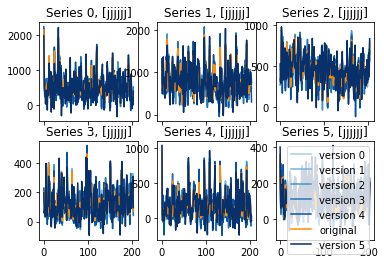

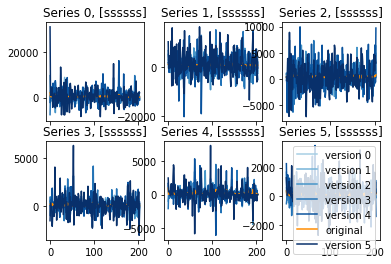

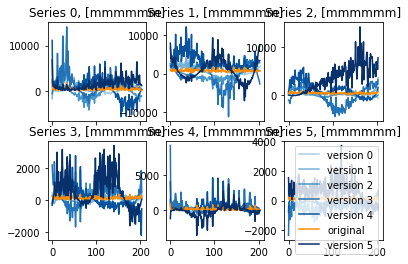

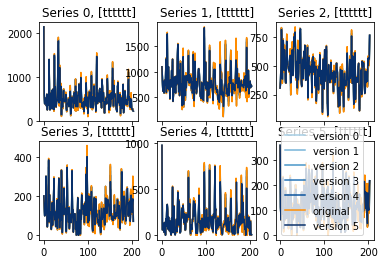

In [13]:
data = tsag.transformations.CreateTransformedVersions(dataset_name)
data.parameters = {"jitter": 0.5,
                   "scaling": 1,
                   "magnitude_warp": 1,
                   "time_warp": 0.0005}
data.create_new_version_single_transf()

In [3]:
vis = tsag.visualization.Visualizer(dataset_name)

In [5]:
algorithm = 'gpf'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)

In [6]:
algorithm = 'mint'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', 
                                   groups=groups,
                                   aggregate_key = '(State / Zone / Region) * Purpose')
            forecasts = mint.train()
            results = mint.results(forecasts)
            res = mint.metrics(results)
            mint.store_metrics(res)

R[write to console]: ── Attaching packages ──────────────────────────────────────────────────────────────── fpp3 0.4.0 ──

R[write to console]: ✔ tibble      3.1.5      ✔ tsibble     1.1.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.4      ✔ feasts      0.2.2 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.5      

R[write to console]: ── Conflicts ───────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

In [5]:
algorithm = 'deepar'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            model = deepar.train()
            forecasts = deepar.predict(model)
            results = deepar.results(forecasts)
            res = deepar.metrics(results)
            deepar.store_metrics(res)

100%|██████████| 50/50 [00:02<00:00, 24.68it/s, epoch=96/100, avg_epoch_loss=4.15]


100%|██████████| 50/50 [00:02<00:00, 23.60it/s, epoch=36/100, avg_epoch_loss=4.28]


100%|██████████| 50/50 [00:02<00:00, 23.54it/s, epoch=68/100, avg_epoch_loss=4.19]


100%|██████████| 50/50 [00:02<00:00, 23.51it/s, epoch=82/100, avg_epoch_loss=4.2] 


100%|██████████| 50/50 [00:02<00:00, 23.73it/s, epoch=12/100, avg_epoch_loss=4.17]


100%|██████████| 50/50 [00:02<00:00, 23.57it/s, epoch=64/100, avg_epoch_loss=4.18]


100%|██████████| 50/50 [00:02<00:00, 23.07it/s, epoch=11/100, avg_epoch_loss=4.2] 


100%|██████████| 50/50 [00:02<00:00, 24.33it/s, epoch=7/100, avg_epoch_loss=4.29]


100%|██████████| 50/50 [00:02<00:00, 24.25it/s, epoch=44/100, avg_epoch_loss=4.22]


100%|██████████| 50/50 [00:02<00:00, 23.45it/s, epoch=76/100, avg_epoch_loss=4.24]


100%|██████████| 304/304 [00:01<00:00, 167.46it/s]


100%|██████████| 50/50 [00:02<00:00, 23.80it/s, epoch=46/100, avg_epoch_loss=4.24]


100%|██████████| 50/50 [00:02<00:00, 22.85it/s, epoch=42/100, avg_epoch_loss=4.19]


100%|██████████| 50/50 [00:02<00:00, 22.85it/s, epoch=45/100, avg_epoch_loss=4.27]


100%|██████████| 50/50 [00:02<00:00, 24.11it/s, epoch=63/100, avg_epoch_loss=4.25]


100%|██████████| 50/50 [00:02<00:00, 22.92it/s, epoch=17/100, avg_epoch_loss=4.24]


100%|██████████| 50/50 [00:02<00:00, 23.57it/s, epoch=45/100, avg_epoch_loss=4.26]


100%|██████████| 50/50 [00:02<00:00, 24.29it/s, epoch=66/100, avg_epoch_loss=4.2] 


100%|██████████| 50/50 [00:02<00:00, 24.59it/s, epoch=85/100, avg_epoch_loss=4.25]


100%|██████████| 50/50 [00:02<00:00, 22.96it/s, epoch=17/100, avg_epoch_loss=4.28]


100%|██████████| 50/50 [00:02<00:00, 23.01it/s, epoch=51/100, avg_epoch_loss=4.29]


100%|██████████| 50/50 [00:02<00:00, 22.06it/s, epoch=1/100, avg_epoch_loss=4.45]


100%|██████████| 50/50 [00:02<00:00, 24.17it/s, epoch=25/100, avg_epoch_loss=4.18]


100%|██████████| 50/50 [00:02<00:00, 23.44it/s, epoch=62/100, avg_epoch_loss=4.18]


100%|██████████| 50/50 [00:02<00:00, 23.16it/s, epoch=89/100, avg_epoch_loss=4.12]


100%|██████████| 50/50 [00:02<00:00, 24.12it/s, epoch=12/100, avg_epoch_loss=4.21]


100%|██████████| 50/50 [00:02<00:00, 23.53it/s, epoch=40/100, avg_epoch_loss=4.21]


100%|██████████| 50/50 [00:02<00:00, 23.78it/s, epoch=71/100, avg_epoch_loss=4.3] 


100%|██████████| 50/50 [00:02<00:00, 23.28it/s, epoch=82/100, avg_epoch_loss=4.19]


100%|██████████| 50/50 [00:02<00:00, 23.55it/s, epoch=81/100, avg_epoch_loss=4.17]


100%|██████████| 50/50 [00:02<00:00, 23.61it/s, epoch=82/100, avg_epoch_loss=4.18]


100%|██████████| 50/50 [00:02<00:00, 23.55it/s, epoch=78/100, avg_epoch_loss=4.22]


100%|██████████| 50/50 [00:02<00:00, 21.98it/s, epoch=1/100, avg_epoch_loss=4.49]


100%|██████████| 50/50 [00:02<00:00, 23.88it/s, epoch=7/100, avg_epoch_loss=4.29]


100%|██████████| 50/50 [00:02<00:00, 22.70it/s, epoch=26/100, avg_epoch_loss=4.2] 


100%|██████████| 50/50 [00:02<00:00, 22.64it/s, epoch=47/100, avg_epoch_loss=4.24]


100%|██████████| 50/50 [00:02<00:00, 23.97it/s, epoch=45/100, avg_epoch_loss=4.21]


100%|██████████| 50/50 [00:02<00:00, 23.38it/s, epoch=76/100, avg_epoch_loss=4.26]


100%|██████████| 50/50 [00:02<00:00, 23.06it/s, epoch=94/100, avg_epoch_loss=4.23]


100%|██████████| 50/50 [00:02<00:00, 23.35it/s, epoch=98/100, avg_epoch_loss=4.23]


100%|██████████| 50/50 [00:02<00:00, 23.14it/s, epoch=21/100, avg_epoch_loss=4.24]


100%|██████████| 50/50 [00:02<00:00, 23.22it/s, epoch=63/100, avg_epoch_loss=4.15]


100%|██████████| 50/50 [00:02<00:00, 24.29it/s, epoch=80/100, avg_epoch_loss=4.22]


100%|██████████| 50/50 [00:02<00:00, 24.48it/s, epoch=3/100, avg_epoch_loss=4.32]


100%|██████████| 50/50 [00:02<00:00, 24.61it/s, epoch=99/100, avg_epoch_loss=4.1] 


100%|██████████| 50/50 [00:02<00:00, 23.33it/s, epoch=3/100, avg_epoch_loss=4.4] 


100%|██████████| 50/50 [00:02<00:00, 24.65it/s, epoch=23/100, avg_epoch_loss=4.3] 


100%|██████████| 50/50 [00:02<00:00, 23.67it/s, epoch=41/100, avg_epoch_loss=4.13]


100%|██████████| 50/50 [00:02<00:00, 24.00it/s, epoch=54/100, avg_epoch_loss=4.19]


100%|██████████| 50/50 [00:02<00:00, 23.15it/s, epoch=73/100, avg_epoch_loss=4.12]


100%|██████████| 50/50 [00:02<00:00, 22.72it/s, epoch=89/100, avg_epoch_loss=4.18]


100%|██████████| 50/50 [00:02<00:00, 24.55it/s, epoch=85/100, avg_epoch_loss=4.1] 


100%|██████████| 50/50 [00:02<00:00, 24.37it/s, epoch=14/100, avg_epoch_loss=4.2] 


100%|██████████| 50/50 [00:02<00:00, 22.63it/s, epoch=10/100, avg_epoch_loss=4.23]


100%|██████████| 304/304 [00:01<00:00, 177.46it/s]
